# Import Packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

 # Inspecting the Image Data 

      *Load data 

In [3]:
X= load_digits().data;#image pixels in a row format
Y=load_digits().target;#label for each image

    *Visualize some images in a  grid plot 

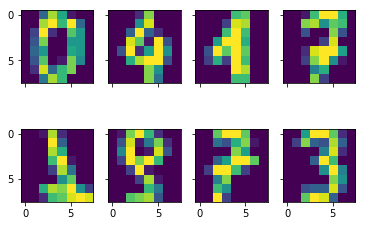

In [13]:

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')
# axes are in a two-dimensional array, indexed by [row, col]
rows=[0,100,200,300,1000,1100,1200,1300]
n=0

for i in range(2):
    for j in range(4):
        first_image=X[rows[n]];
        first_image_2D=first_image.reshape(8,8) #  *Convert row to a 2D numpy array 
        ax[i, j].imshow(first_image_2D)# plot the image in the current i,j grid
        n=n+1



#  KNN with KFold Cross Validation

    *Define functions

In [14]:
def train(x,y,k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    return knn

def test(Xtr,Ytr,Xte,k):
    Yte=train(Xtr,Ytr,k).predict(Xte)
    return Yte

def cv_knn(X,Y,k):
    
    k_fold = KFold(n_splits=4)
    scores=[]
    for train_indices, test_indices in k_fold.split(X):
        trainX=X[train_indices]
        trainY=Y[train_indices]
        testX=X[test_indices]
        y_pred= test(trainX,trainY,testX,k)
        Fit=train(trainX,trainY,k)
        score=accuracy_score(y_pred, Y[test_indices])
        scores.append(score)
    return np.mean(scores)

    *Calculate accuracies for different k values

Text(0,0.5,'Mean Accuracy')

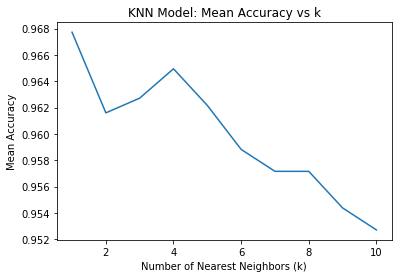

In [15]:
knn_accuracies=[]
k=np.linspace(1,10,10)

for i in k:
    knn_accuracy=cv_knn(X,Y,int(i))
    knn_accuracies.append(knn_accuracy)
   
plt.plot(k,knn_accuracies)
plt.title('KNN Model: Mean Accuracy vs k')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Mean Accuracy')

In [16]:
print(knn_accuracies)

[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697, 0.9527097253155159]


# Neural Network with Single Hidden  Layer 

* Calculate accuracies for different number of neurons in single hidden layer 

C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Mean Accuracy')

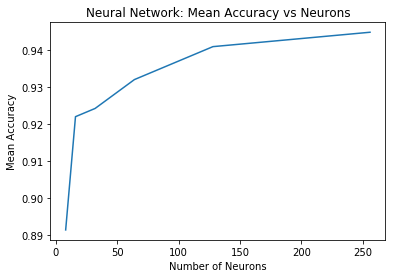

In [20]:
neurons=[8,16,32,64,128,256]
mlp_accuracies=[]
for n in neurons:
    model=MLPClassifier(hidden_layer_sizes=(n,))
    scores_mlp=[]
    n_fold = KFold(n_splits=4)
    for train_indices, test_indices in n_fold.split(X):
        trainX=X[train_indices]
        trainY=Y[train_indices]
        testX=X[test_indices]
        model.fit(trainX,trainY)
        y_pred_mlp= model.predict(testX)
        score_mlp=accuracy_score(y_pred_mlp, Y[test_indices])
        scores_mlp.append(score_mlp)
 
    mlp_accuracies.append(np.mean(scores_mlp))

plt.plot(neurons,mlp_accuracies)
plt.title('Neural Network: Mean Accuracy vs Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')


In [18]:
print(mlp_accuracies)

[0.8859069537243256, 0.9137379361544173, 0.9254268745360059, 0.9348886414253897, 0.9426713684731503, 0.9460170749814402]


# Neural Network with Two  Hidden Layers

    *Calculate accuracies for different number of neurons in two hidden layers 

Text(0,0.5,'Mean Accuracy')

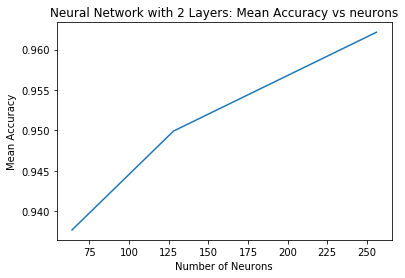

In [25]:
neuronh2=[(64,64),(128,128),(256,256)]

mlph2_accuracies=[]
for l in neuronh2:
    model=MLPClassifier(hidden_layer_sizes=(l))
    scores_mlph2=[]
    n_fold = KFold(n_splits=4)
    for train_indices, test_indices in n_fold.split(X):
        trainX=X[train_indices]
        trainY=Y[train_indices]
        testX=X[test_indices]
        model.fit(trainX,trainY)
        y_pred_mlph2= model.predict(testX)
        score_mlph2=accuracy_score(y_pred_mlph2, Y[test_indices])
        scores_mlph2.append(score_mlph2)
 
    mlph2_accuracies.append(np.mean(scores_mlph2))
    
n2=[i[0] for i in neuronh2]
plt.plot(n2,mlph2_accuracies)
plt.title('Neural Network with 2 Layers: Mean Accuracy vs neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')


In [23]:
print(mlph2_accuracies)

[0.9471306607275427, 0.9499121504578075, 0.9532491957436278]


# Neural Network with Three  Hidden Layers

* Calculate accuracies for different number of neurons in three hidden layers 

Text(0,0.5,'Mean Accuracy')

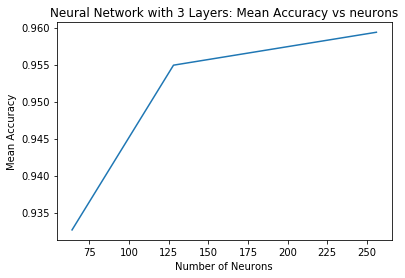

In [26]:
neuronh3=[(64,64,64),(128,128,128),(256,256,256)]

mlph3_accuracies=[]
for l in neuronh3:
    model=MLPClassifier(hidden_layer_sizes=(l))
    scores_mlph3=[]
    n_fold = KFold(n_splits=4)
    for train_indices, test_indices in n_fold.split(X):
        trainX=X[train_indices]
        trainY=Y[train_indices]
        testX=X[test_indices]
        model.fit(trainX,trainY)
        y_pred_mlph3= model.predict(testX)
        score_mlph3=accuracy_score(y_pred_mlph3, Y[test_indices])
        scores_mlph3.append(score_mlph3)
 
    mlph3_accuracies.append(np.mean(scores_mlph3))
    
n3=[i[0] for i in neuronh3]
plt.plot(n3,mlph3_accuracies)
plt.title('Neural Network with 3 Layers: Mean Accuracy vs neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')

In [17]:
print(mlph3_accuracies)

[0.9499059638703291, 0.9454578074733977, 0.9565924276169265]


# Conclusion

In [ ]:
* Calculate accuracies for different number of neurons in two hidden layers 